In [30]:
import sys
sys.path.append("..")
# Now you can import your module
from helpers import *

## 1. Loading Libaries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Load PHQ_9 Dataset and create a training and test set

In [32]:
df = pd.read_csv('../data/Threshold_3_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv')
print_information(df)

features = []
targets = []
for indx, row in df.iterrows():
    feature = []
    for column in df.columns:
        if 'FEATURE' in column:
            feature.append(row[column])
    features.append(feature)
    targets.append(row['Depression'])

features = np.array(features, dtype=np.float32)
targets = np.array(targets, dtype=np.int16)

X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.2, random_state=42)


0.0
ID_1          80
ID_2          80
group_id      80
SEX           80
AGE           80
              ..
FEATURE_51    80
FEATURE_52    80
FEATURE_53    80
FEATURE_54    80
FEATURE_55    80
Length: 65, dtype: int64
1.0
ID_1          80
ID_2          80
group_id      80
SEX           80
AGE           80
              ..
FEATURE_51    80
FEATURE_52    80
FEATURE_53    80
FEATURE_54    80
FEATURE_55    80
Length: 65, dtype: int64
2.0
ID_1          80
ID_2          80
group_id      80
SEX           80
AGE           80
              ..
FEATURE_51    80
FEATURE_52    80
FEATURE_53    80
FEATURE_54    80
FEATURE_55    80
Length: 65, dtype: int64
3.0
ID_1          80
ID_2          80
group_id      80
SEX           80
AGE           80
              ..
FEATURE_51    80
FEATURE_52    80
FEATURE_53    80
FEATURE_54    80
FEATURE_55    80
Length: 65, dtype: int64
6.0
ID_1          80
ID_2          80
group_id      80
SEX           80
AGE           80
              ..
FEATURE_51    80
FEATURE_52   

## 3. Hyperparameter Tuning

- Using depth, Number of tress and the learning_rate as parameters for tuning

In [33]:

results = {}

depths = [1,2,3,4]
n_estimators = [50,60,70,80,90,100]
learning_rates = [0.3,0.6,1]
number = 0
all_numbers = len(depths) * len(n_estimators) * len(learning_rates)
for depth in depths:
    for n_estimator in n_estimators:
        for learning_rate in learning_rates:
            number += 1
            base_estimator = DecisionTreeClassifier(max_depth=depth)
            ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimator, learning_rate=learning_rate, random_state=42)
            ada_boost.fit(X_train, y_train)
            y_pred = ada_boost.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[(depth, n_estimator, learning_rate)] = accuracy
            print(f'{number}/{all_numbers} - Accuracy: {accuracy} - Depth: {depth} - Estimators: {n_estimator} - Learning Rate: {learning_rate}')

print(results)


1/72 - Accuracy: 0.6875 - Depth: 1 - Estimators: 50 - Learning Rate: 0.3
2/72 - Accuracy: 0.6796875 - Depth: 1 - Estimators: 50 - Learning Rate: 0.6
3/72 - Accuracy: 0.65625 - Depth: 1 - Estimators: 50 - Learning Rate: 1
4/72 - Accuracy: 0.6875 - Depth: 1 - Estimators: 60 - Learning Rate: 0.3
5/72 - Accuracy: 0.671875 - Depth: 1 - Estimators: 60 - Learning Rate: 0.6
6/72 - Accuracy: 0.671875 - Depth: 1 - Estimators: 60 - Learning Rate: 1
7/72 - Accuracy: 0.6953125 - Depth: 1 - Estimators: 70 - Learning Rate: 0.3
8/72 - Accuracy: 0.6640625 - Depth: 1 - Estimators: 70 - Learning Rate: 0.6
9/72 - Accuracy: 0.6875 - Depth: 1 - Estimators: 70 - Learning Rate: 1
10/72 - Accuracy: 0.703125 - Depth: 1 - Estimators: 80 - Learning Rate: 0.3
11/72 - Accuracy: 0.703125 - Depth: 1 - Estimators: 80 - Learning Rate: 0.6
12/72 - Accuracy: 0.6953125 - Depth: 1 - Estimators: 80 - Learning Rate: 1
13/72 - Accuracy: 0.703125 - Depth: 1 - Estimators: 90 - Learning Rate: 0.3
14/72 - Accuracy: 0.6953125 - De

Save the results into a dataframe

In [34]:
df = pd.DataFrame()
depth_df = []
n_estimators_df = []
learning_rate_df = []
accuracy_df = []

for key,value in results.items():
    accuracy_df.append(value)
    depth_df.append(key[0])
    n_estimators_df.append(key[1])
    learning_rate_df.append(key[2])
 
df['depth'] = depth_df
df['Number_Trees'] = n_estimators_df
df['Learning Rate'] = learning_rate_df
df['Accuracy'] = accuracy_df
print(df)

    depth  Number_Trees  Learning Rate  Accuracy
0       1            50            0.3  0.687500
1       1            50            0.6  0.679688
2       1            50            1.0  0.656250
3       1            60            0.3  0.687500
4       1            60            0.6  0.671875
..    ...           ...            ...       ...
67      4            90            0.6  0.734375
68      4            90            1.0  0.734375
69      4           100            0.3  0.750000
70      4           100            0.6  0.757812
71      4           100            1.0  0.726562

[72 rows x 4 columns]


In [35]:
df.to_csv('Results/Adaboost_BP_PHQ_9.csv', index=False)

Do the same for the MH_PHQ_S Classifier

Load data

In [36]:
df = pd.read_csv('../data/Threshold_15_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv')
print_information(df)

features = []
targets = []
for indx, row in df.iterrows():
    feature = []
    for column in df.columns:
        if 'FEATURE' in column:
            feature.append(row[column])
    features.append(feature)
    targets.append(row['Depression'])

features = np.array(features, dtype=np.float32)
targets = np.array(targets, dtype=np.int16)

X_train2, X_test2, y_train2, y_test2 = train_test_split(features,targets, test_size=0.2, random_state=42)

0.0
ID_1          40
ID_2          40
group_id      40
SEX           40
AGE           40
              ..
FEATURE_51    40
FEATURE_52    40
FEATURE_53    40
FEATURE_54    40
FEATURE_55    40
Length: 65, dtype: int64
1.0
ID_1          40
ID_2          40
group_id      40
SEX           40
AGE           40
              ..
FEATURE_51    40
FEATURE_52    40
FEATURE_53    40
FEATURE_54    40
FEATURE_55    40
Length: 65, dtype: int64
2.0
ID_1          40
ID_2          40
group_id      40
SEX           40
AGE           40
              ..
FEATURE_51    40
FEATURE_52    40
FEATURE_53    40
FEATURE_54    40
FEATURE_55    40
Length: 65, dtype: int64
3.0
ID_1          40
ID_2          40
group_id      40
SEX           40
AGE           40
              ..
FEATURE_51    40
FEATURE_52    40
FEATURE_53    40
FEATURE_54    40
FEATURE_55    40
Length: 65, dtype: int64
4.0
ID_1          40
ID_2          40
group_id      40
SEX           40
AGE           40
              ..
FEATURE_51    40
FEATURE_52   

Do hyperparameter tuning

In [37]:
results = {}

depths = [1,2,3,4]
n_estimators = [50,60,70,80,90,100]
learning_rates = [0.3,0.6,1]
number = 0
all_numbers = len(depths) * len(n_estimators) * len(learning_rates)
for depth in depths:
    for n_estimator in n_estimators:
        for learning_rate in learning_rates:
            number += 1
            base_estimator = DecisionTreeClassifier(max_depth=depth)
            ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimator, learning_rate=learning_rate, random_state=42)
            ada_boost.fit(X_train2, y_train2)
            y_pred = ada_boost.predict(X_test2)
            accuracy = accuracy_score(y_test2, y_pred)
            results[(depth, n_estimator, learning_rate)] = accuracy
            print(f'{number}/{all_numbers} - Accuracy: {accuracy} - Depth: {depth} - Estimators: {n_estimator} - Learning Rate: {learning_rate}')

print(results)

1/72 - Accuracy: 0.6651785714285714 - Depth: 1 - Estimators: 50 - Learning Rate: 0.3
2/72 - Accuracy: 0.6607142857142857 - Depth: 1 - Estimators: 50 - Learning Rate: 0.6
3/72 - Accuracy: 0.6428571428571429 - Depth: 1 - Estimators: 50 - Learning Rate: 1
4/72 - Accuracy: 0.6473214285714286 - Depth: 1 - Estimators: 60 - Learning Rate: 0.3
5/72 - Accuracy: 0.6517857142857143 - Depth: 1 - Estimators: 60 - Learning Rate: 0.6
6/72 - Accuracy: 0.6428571428571429 - Depth: 1 - Estimators: 60 - Learning Rate: 1
7/72 - Accuracy: 0.65625 - Depth: 1 - Estimators: 70 - Learning Rate: 0.3
8/72 - Accuracy: 0.6473214285714286 - Depth: 1 - Estimators: 70 - Learning Rate: 0.6
9/72 - Accuracy: 0.5982142857142857 - Depth: 1 - Estimators: 70 - Learning Rate: 1
10/72 - Accuracy: 0.65625 - Depth: 1 - Estimators: 80 - Learning Rate: 0.3
11/72 - Accuracy: 0.6517857142857143 - Depth: 1 - Estimators: 80 - Learning Rate: 0.6
12/72 - Accuracy: 0.6205357142857143 - Depth: 1 - Estimators: 80 - Learning Rate: 1
13/72 -

Save results into a dataframe

In [38]:
df = pd.DataFrame()
depth_df = []
n_estimators_df = []
learning_rate_df = []
accuracy_df = []

for key,value in results.items():
    accuracy_df.append(value)
    depth_df.append(key[0])
    n_estimators_df.append(key[1])
    learning_rate_df.append(key[2])
 
df['depth'] = depth_df
df['Number_Trees'] = n_estimators_df
df['Learning Rate'] = learning_rate_df
df['Accuracy'] = accuracy_df
print(df)

    depth  Number_Trees  Learning Rate  Accuracy
0       1            50            0.3  0.665179
1       1            50            0.6  0.660714
2       1            50            1.0  0.642857
3       1            60            0.3  0.647321
4       1            60            0.6  0.651786
..    ...           ...            ...       ...
67      4            90            0.6  0.687500
68      4            90            1.0  0.683036
69      4           100            0.3  0.683036
70      4           100            0.6  0.687500
71      4           100            1.0  0.683036

[72 rows x 4 columns]


In [39]:
df.to_csv('Results/Adaboost_MH_PHQ_S.csv', index=False)

## 4. Train Adaboost on data with the best performing hyperparameters

Get the best performing hyperparameters

In [40]:
bp_phq_9 = pd.read_csv('Results/Adaboost_BP_PHQ_9.csv')
mh_phq_s = pd.read_csv('Results/Adaboost_MH_PHQ_S.csv')

max_index_phq9 = bp_phq_9['Accuracy'].idxmax()
max_index_mh_phq_s = mh_phq_s['Accuracy'].idxmax()

print(bp_phq_9.loc[max_index_phq9])
print(mh_phq_s.loc[max_index_mh_phq_s])

depth             4.000000
Number_Trees     70.000000
Learning Rate     0.300000
Accuracy          0.765625
Name: 60, dtype: float64
depth             3.000000
Number_Trees     80.000000
Learning Rate     0.600000
Accuracy          0.732143
Name: 46, dtype: float64


Best Performing Hyperparameters
- Adaboost BP_PHQ_9: depth of trees 4, number of trees 70, learning rate 0.3
- Adaboost MH_PHQ_S: depth of trees 3, number of trees 80, learning rate 0.6

Now train Adaboost on these two parametersets 

- Training the BP_PHQ_9 Adaboost
- Creating a confusion matrix
- calculate the metrics such as precision, recall, f1 score

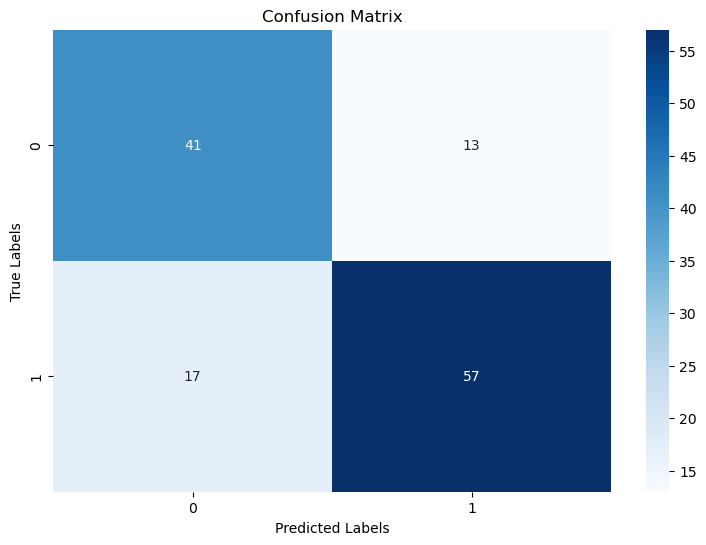

Accuracy:  0.765625
Precision:  0.8142857142857143
Recall:  0.7702702702702703
F1:  0.7916666666666666


In [41]:

# Using the optimal hyperparameters to get metrices and scores
learning_rate = 0.3
depth = 4
n_estimator = 70

base_estimator = DecisionTreeClassifier(max_depth=depth)
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimator, learning_rate=learning_rate, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Now train Adaboost on MH_PHQ_S Dataset

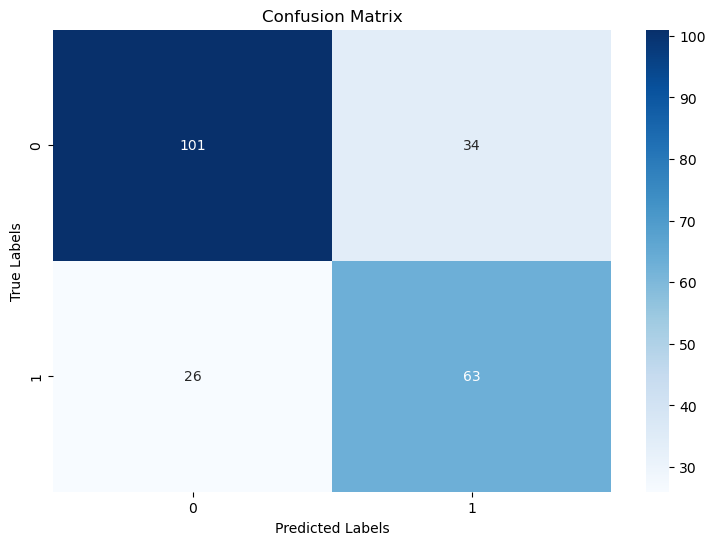

Accuracy:  0.7321428571428571
Precision:  0.6494845360824743
Recall:  0.7078651685393258
F1:  0.6774193548387096


In [42]:
# Using the optimal hyperparameters to get metrices and scores
learning_rate = 0.6
depth = 3
n_estimator = 80

base_estimator = DecisionTreeClassifier(max_depth=depth)
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimator, learning_rate=learning_rate, random_state=42)
ada_boost.fit(X_train2, y_train2)
y_pred = ada_boost.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred)


# Generate confusion matrix
cm = confusion_matrix(y_test2, y_pred)

# # Plot confusion matrix
plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN) # True positive rate
FNR = FN / (TP + FN) # False negative rate
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)